### Importing modules and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv(r"D:\Projects\Employee Churn\Dataset\employee dataset.csv")

### Data Analyzation

In [3]:
dataset.info()
dataset.isnull().sum()
# Most of the parameters are of type object with just 3 being a numercial value.
# Data does not have a null value in any of the column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
dataset.head()
# We can see first five rows of the data, this gives us an insight on the predictables and the kind of data they store.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Manipulation

In [6]:
dataset = dataset.replace(['No internet service'],'No')
streaming = dataset.loc[:30,['StreamingTV', 'StreamingMovies', 'InternetService', 'Churn']]
print(streaming)

# Value 'No internet service' in the column StreamingTV and StreamingMovies is changed to No as there already exist a 
# column for Internet service and convey similar information

   StreamingTV StreamingMovies InternetService Churn
0           No              No             DSL    No
1           No              No             DSL    No
2           No              No             DSL   Yes
3           No              No             DSL    No
4           No              No     Fiber optic   Yes
5          Yes             Yes     Fiber optic   Yes
6          Yes              No     Fiber optic    No
7           No              No             DSL    No
8          Yes             Yes     Fiber optic   Yes
9           No              No             DSL    No
10          No              No             DSL    No
11          No              No              No    No
12         Yes             Yes     Fiber optic    No
13         Yes             Yes     Fiber optic   Yes
14         Yes             Yes     Fiber optic    No
15         Yes             Yes     Fiber optic    No
16          No              No              No    No
17         Yes             Yes     Fiber optic

In [7]:
dataset.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [8]:
dataset = dataset.replace(['No phone service'],'No')
dataset.loc[:30,['PhoneService', 'MultipleLines', 'Churn']]
# similarly changed 'No phone service' to No as there exist a sepreate column PhoneService

,PhoneService,MultipleLines,Churn
0,No,No,No
1,Yes,No,No
2,Yes,No,Yes
3,No,No,No
4,Yes,No,Yes
5,Yes,Yes,Yes
6,Yes,Yes,No
7,No,No,No
8,Yes,Yes,Yes
9,Yes,No,No


In [9]:
dataset.PaymentMethod.value_counts()
#dataset.loc[:30,['DeviceProtection', 'TechSupport', 'Churn']]

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [10]:
dataset = dataset.replace(['Bank transfer (automatic)', 'Credit card (automatic)'],'Automatic')
dataset.PaymentMethod.value_counts()

# Bank transfer and credit card are both automatic means of payment that does not seem to have distinct effect on the 
# churn of employeese and so is merged to be single column Automatic

Automatic           3066
Electronic check    2365
Mailed check        1612
Name: PaymentMethod, dtype: int64

In [11]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ','')
dataframe = pd.DataFrame(dataset['TotalCharges'])
dataframe['TotalCharges'].replace('',float("NaN"),inplace=True)
#dataframe['TotalCharges'].dropna(inplace=True)
dataframe = dataframe.astype(float)
meanVal = dataframe.mean()
dataset['TotalCharges'].replace('',meanVal[0], inplace=True)
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

In [12]:
print(len(dataset['TotalCharges']))
print(dataset['TotalCharges'].dtypes)
print("Mean Value =",meanVal[0])
print(dataset['TotalCharges'][488])

# Missing values inside column TotalCharges is replaced with mean of column
# Column TotalCharges is converted from Type-Object to Type-float64

7043
float64
Mean Value = 2283.3004408418697
2283.3004408418697


### Data Visualization

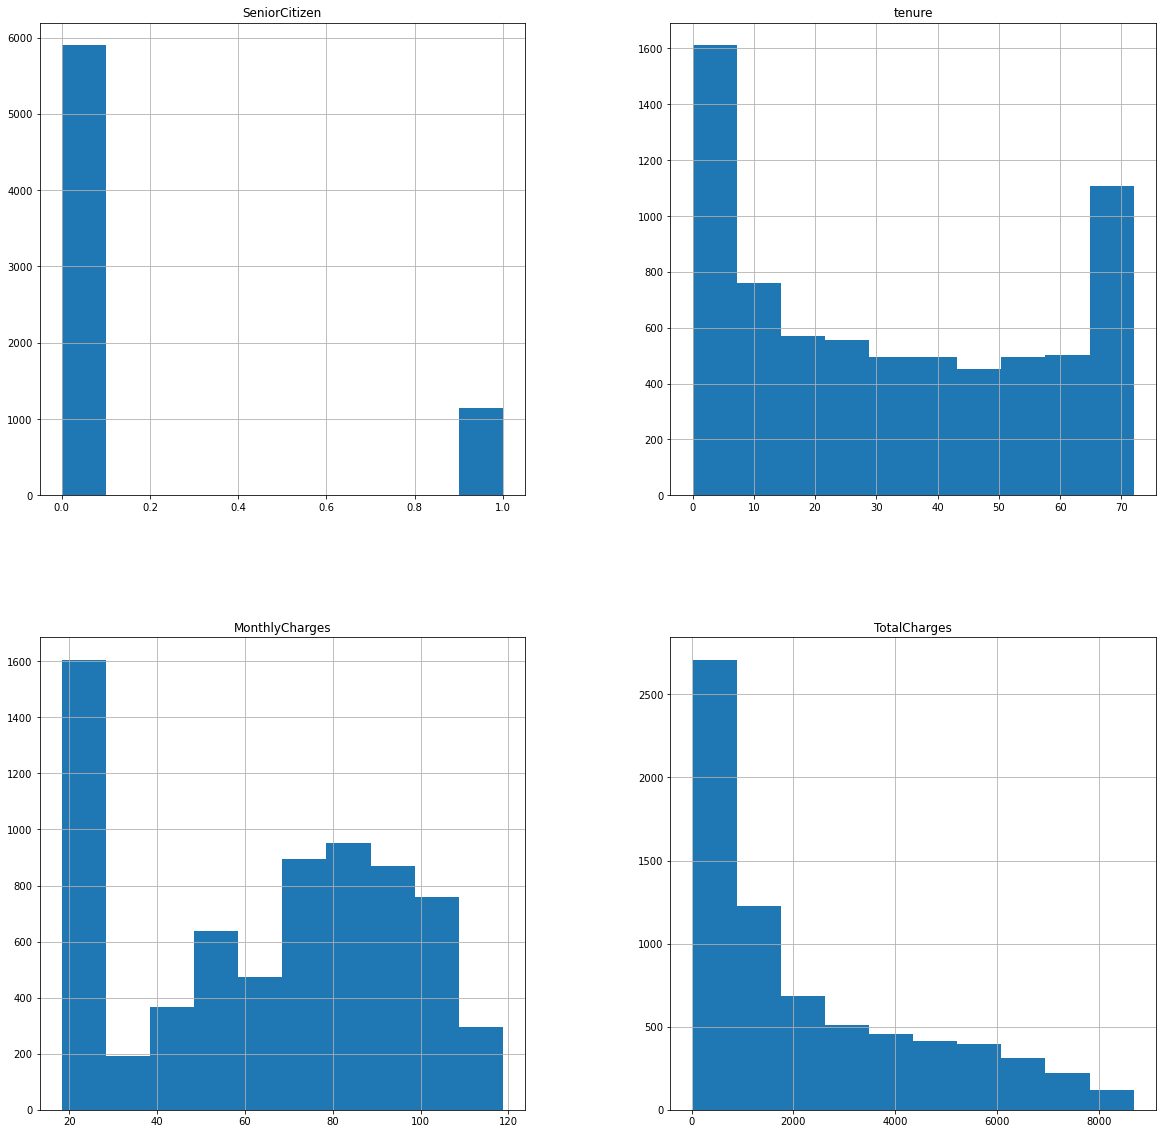

In [13]:
dataset.hist(figsize=(20,20))
plt.show()

<AxesSubplot:ylabel='Churn'>

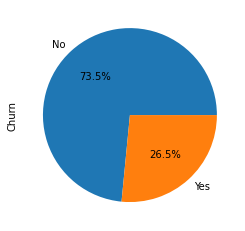

In [14]:
dataset['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
# Plot describes that roughly 26.5% employees churn in this company
# Below let us draft a few more plots comparing other attributes and build deduction using it.

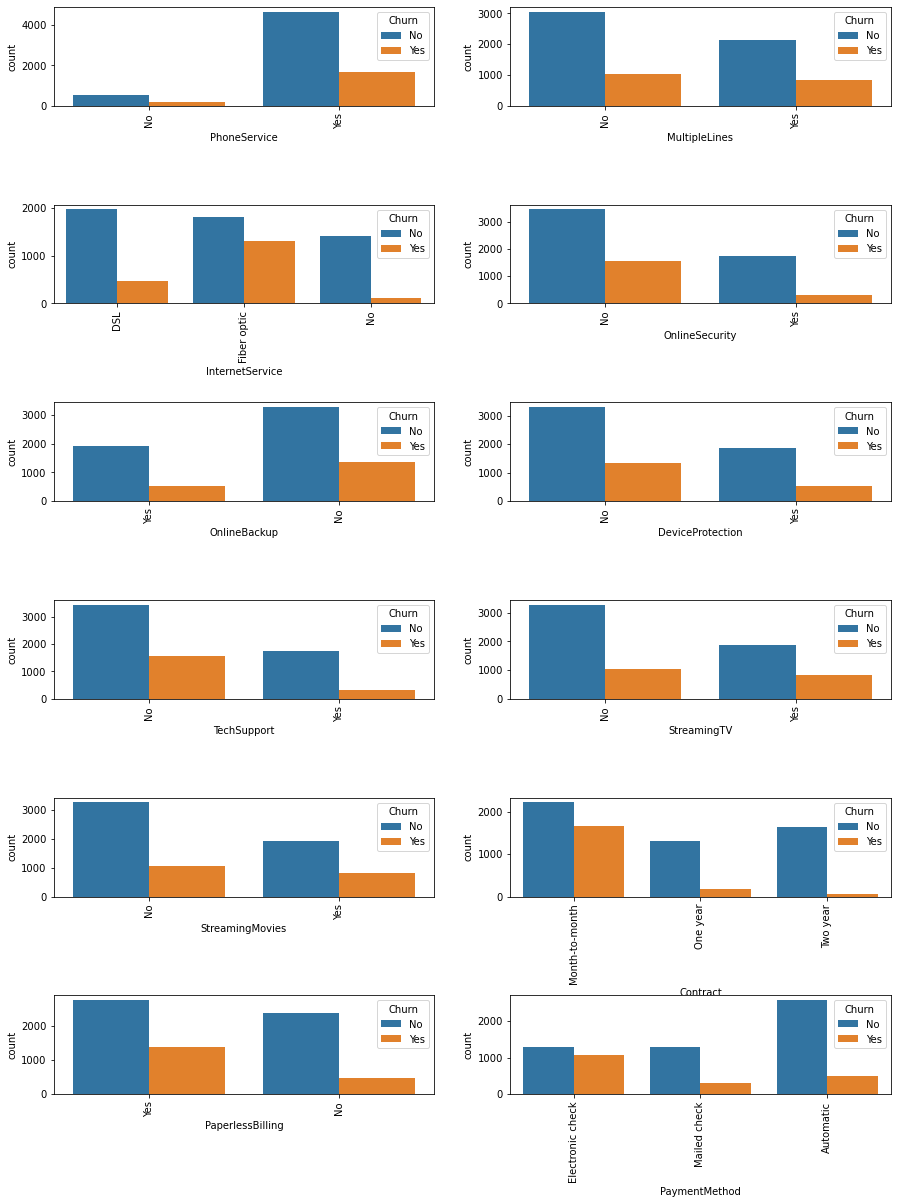

In [15]:
fig=plt.subplots(figsize=(15,20))
features = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for i, j in enumerate(features):
     plt.subplot(6, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = dataset, hue='Churn')
     plt.xticks(rotation=90)

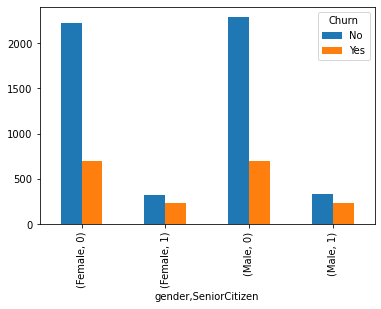

In [16]:
pd.crosstab([dataset.gender,dataset.SeniorCitizen],dataset.Churn).plot(kind='bar')
plt.show()

<AxesSubplot:ylabel='tenure'>

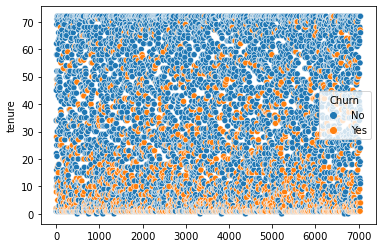

In [17]:
sns.scatterplot(data = dataset, y='tenure',x=range(0,7043), hue='Churn')

<AxesSubplot:xlabel='TotalCharges'>

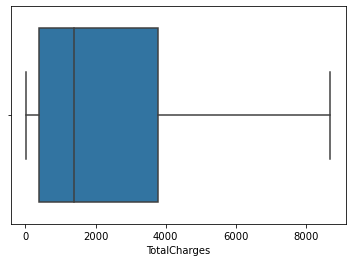

In [18]:
sns.boxplot(x = dataset.TotalCharges)

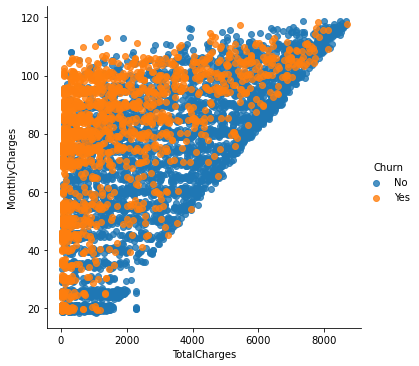

In [19]:
sns.lmplot(x='TotalCharges', y='MonthlyCharges', data=dataset, hue='Churn', fit_reg = False)
plt.show()

<AxesSubplot:xlabel='Dependents'>

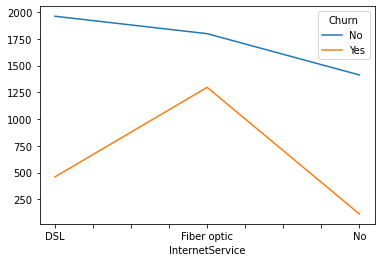

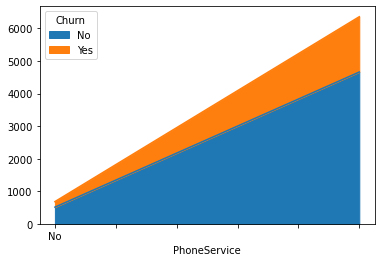

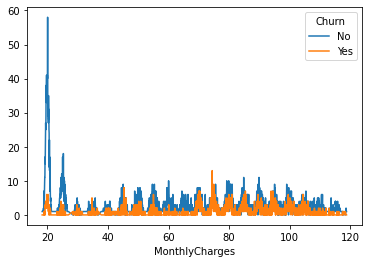

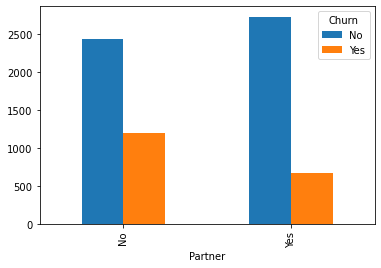

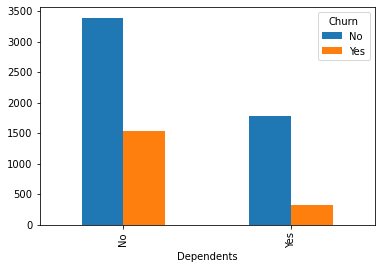

In [22]:
pd.crosstab(dataset.InternetService,dataset.Churn).plot(kind='line')
pd.crosstab(dataset.PhoneService,dataset.Churn).plot(kind='area')
pd.crosstab(dataset.MonthlyCharges,dataset.Churn).plot(kind='line')
pd.crosstab(dataset.Partner,dataset.Churn).plot(kind='bar')
pd.crosstab(dataset.Dependents,dataset.Churn).plot(kind='bar')

### Analysis conclusion

In [39]:
# In conclusion, analysis of the data represents-

# 1) Gender does not seem to have much effect on the churn rate at all however employee who are not senior citizen are more 
#    prone to churn than senior citizen regardless of their respective gender

# 2) Chrun looks to be inversely propotional with tenure period, the shorter the tenure higher the chance of attrition

# 3) Maximum of employee have Phone services so it does not affect churn very much but churn have a slightly more 
#    possibility if an employee have multiple lines

# 4) An employee is substantially more liable to churn if the Internet service is Fiber optic

# 5) A major factor of significance is contract with Month-to-month being being the prime reason of employee churn than
#    one and two year contracts which seems insignificant

# 6) Employees with paperless biling show more churn than employees without paperless biling

# 7) Electronic check in payment method is also a major contributer for attrition followed by mailed check and both 
#    automatic method

# 8) Churn is likely to be more adverse for employees who have a high ammount of monthly charge especially charges between
#    40-55 and 70-110 where churn seems to be more dense and strangely tends to decrease further.

### Implement Machine Learning Models

In [24]:
Data = dataset[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()
# Selectively removed customerID, gender and PhoneService
# Customer ID because it's unique
# Gender because it does not effect churn and we won't have to perform one-hot encoding that would infalte our model
# PhoneService because a majority of employee have a phone service and so won't have a decent effect on our prediction

In [25]:
# In order to handle the massive catagorical data we will import the label encoder from sklearn and convert string 
# into numeric data
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
#hotencoder = preprocessing.OneHotEncoder()
Data['Partner'] = encoder.fit_transform(Data['Partner'])
Data['Dependents'] = encoder.fit_transform(Data['Dependents'])
Data['OnlineBackup'] = encoder.fit_transform(Data['OnlineBackup'])
Data['MultipleLines'] = encoder.fit_transform(Data['MultipleLines'])
Data['OnlineSecurity'] = encoder.fit_transform(Data['OnlineSecurity'])
Data['DeviceProtection'] = encoder.fit_transform(Data['DeviceProtection'])
Data['TechSupport'] = encoder.fit_transform(Data['TechSupport'])
Data['StreamingTV'] = encoder.fit_transform(Data['StreamingTV'])
Data['StreamingMovies'] = encoder.fit_transform(Data['StreamingMovies'])
Data['PaperlessBilling'] = encoder.fit_transform(Data['PaperlessBilling'])
Data['Churn'] = encoder.fit_transform(Data['Churn'])
Data['InternetService'] = encoder.fit_transform(Data['InternetService'])
#Data['PaymentMethod'] = encoder.fit_transform(Data['PaymentMethod'])
#Data['Contract'] = encoder.fit_transform(Data['Contract'])

# Internet service, Contract and Payment method is transformed through get dummies function
Data = pd.get_dummies(Data,columns=['PaymentMethod','Contract'])
#Data['PaymentMethod'] = hotencoder.fit_transform(Data['PaymentMethod'])
#Data['Contract'] = hotencoder.fit_transform(Data['Contract'])

In [26]:
Data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,34,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,2,0,1,1,0,0,0,...,1,1,0,0,0,0,1,1,0,0
3,0,0,0,45,0,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,2,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [33]:
# Extracting feature and target and using it to split data into calibration and validation set

x = Data[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Automatic', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year']]
y = Data['Churn']

from sklearn.model_selection import train_test_split

x_calib, x_valid, y_calib, y_valid = train_test_split(x, y, test_size=3043,random_state=42)

#### Random Forest

In [34]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(x_calib,y_calib);

In [35]:
prediction = rf.predict(x_valid)
fea = pd.Series(rf.feature_importances_).sort_values(ascending=False)
print(fea) # This will display features and their importance
print(metrics.accuracy_score(y_valid,prediction)*100,'%') 

13    0.196807
12    0.186555
3     0.164918
20    0.063124
15    0.035047
18    0.028858
11    0.026835
1     0.025210
22    0.023435
6     0.022836
5     0.022724
2     0.021742
4     0.021721
8     0.020443
7     0.020388
0     0.020058
10    0.019752
9     0.018372
17    0.014573
16    0.012414
21    0.012321
19    0.012103
14    0.009762
dtype: float64
79.46105816628327 %


#### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_calib,y_calib)
prediction = gb.predict(x_valid)
print(metrics.accuracy_score(y_valid,prediction)*100,'%')
print(metrics.confusion_matrix(y_valid,prediction))

80.54551429510352 %
[[2004  230]
 [ 362  447]]


#### Support Vector Classification

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
sv= make_pipeline(StandardScaler(),SVC(gamma='auto'))
sv.fit(x_calib,y_calib)
prediction = sv.predict(x_valid)
print(metrics.accuracy_score(y_valid,prediction)*100,'%')

79.88826815642457 %


#### Final Conclusion

In [40]:
# All three models result in accuracy of around 80% which could be improved further by data manipulation and tuning the models.

# Conclusion
# 1. Gradient boosting algorithm seems to be promissing as compared to other two however i feel the k nearest algorithm 
#    could also produce fair results
# 2. Factors that were the leading cause for employee churn were- PaperlessBiling, MonthlyCharges, Dependents and 
#    MailedCheck in payment method, these factor do seem to make sense as backed by the analysis we did using graphs 
#    that as employees who have paperless billing, more monthly charges, not a dependent and do not recive mailed checks are
#    more prone to churn
# 3. To encorage the employees company should either shift to hardcopy billing or encorage or teach the staff how to use
#    paperless billing, now in order to decrease monthly charges company can shift the internet services from fiber optics 
#    DSL which will decrease internet cost and reduce churn as employee who have fiber shows to churn more other cost
#    efficient changes could be done with Streaming TV and movies as a less than a quater percentage of employees use them,
#    also if employees have month to month conract they are more vulnerable to churn so increasing the contract period might
#    help and lastly company should mailed checks as their payment method or encorage their employees to use other methods 
# 4. One way to determine if employee had worked after changes is that data could be gathered before and after implementaion
#    of changes on employee productivity and compared with churn data, if churn rate decreases and productivity stays same
#    or increases minutely after changes as comapred to before then employees are not working.



# Created by Akshat Kothari (April, 2021)